# 0. Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
from utils import Dataset, plot_image
from capsnet import CapsNet

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

# 1. Dataset

In [4]:
data_name_1 = 'MNIST'
dataset_1 = Dataset(data_name_1)

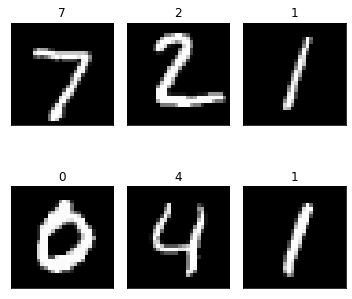

(28, 28, 1) (10,)


In [5]:
n_img = 6
plot_image(dataset_1.x_test[:n_img], dataset_1.y_test[:n_img], dataset_1.class_names, n_img)
print(dataset_1.x_test[0].shape, dataset_1.y_test[0].shape)

In [6]:
data_name_2 = 'SMALLNORB'
dataset_2 = Dataset(data_name_2)

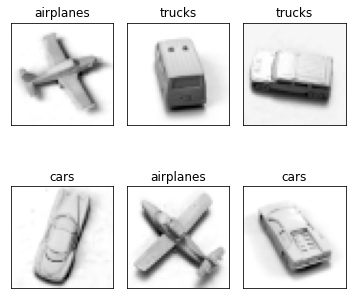

(48, 48, 2) (5,)


In [7]:
n_img = 6
plot_image(dataset_2.x_test[:n_img], dataset_2.y_test[:n_img], dataset_2.class_names, n_img)
print(dataset_2.x_test[0].shape, dataset_2.y_test[0].shape)

# 2. Load Model

In [8]:
model_train = CapsNet(data_name_2, mode='train', r=3)

Model: "Encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 48, 48, 2)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 40, 40, 256)       41728     
_________________________________________________________________
primary_caps (PrimaryCaps)   (None, 16, 16, 32, 8)     5308672   
_________________________________________________________________
digit_caps (DigitCaps)       (None, 5, 16)             5242960   
_________________________________________________________________
length (Length)              (None, 5)                 0         
Total params: 10,593,360
Trainable params: 10,593,360
Non-trainable params: 0
_________________________________________________________________
Model: "Decoder"
_________________________________________________________________
Layer (type)                 O

# 3. Train Model

In [9]:
data_train, data_test = dataset_2.get_tf_data()
history = model_train.train(dataset_2, initial_epoch=0)

Epoch 1/100
810/810 [==============================] - 441s 528ms/step - loss: 1.5971 - Encoder_loss: 0.4360 - Decoder_loss: 2.9619 - Encoder_accuracy: 0.4532 - val_loss: 0.7903 - val_Encoder_loss: 0.1565 - val_Decoder_loss: 1.6169 - val_Encoder_accuracy: 0.8228

Epoch 00001: saving model to ./logs/capsnet_SMALLNORB\weights-01.h5
Epoch 2/100
129/810 [===>..........................] - ETA: 2:37 - loss: 1.2091 - Encoder_loss: 0.1804 - Decoder_loss: 2.6243 - Encoder_accuracy: 0.7938

KeyboardInterrupt: 